# This script calculates how long it takes for an impulse to decay to 10% of its original size using Gerard's weighted average of neighboring time points algorithm.

In [2]:
import numpy as np
import pandas as pd
import scipy.io
import os
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import preprocessing
import sys
from scipy import stats
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n_tpt=100000
Sf=10
max_a=15
thresh_tpt=np.zeros(max_a-2)
for a in range(2,max_a):
    alph=1/(2**a)
    print('a=%d, alph=%f' % (a,alph))
    dat=np.zeros(n_tpt+1)
    dat[0]=1
    for t in range(n_tpt):
        dat[t+1]=dat[t]*(1-alph)+alph*dat[t+1]
        if dat[t+1]<=.1:
            print('Thresh at tpt %d (or %f sec)' % (t,t/Sf))
            thresh_tpt[a-2]=t
            break

a=2, alph=0.250000
Thresh at tpt 8 (or 0.800000 sec)
a=3, alph=0.125000
Thresh at tpt 17 (or 1.700000 sec)
a=4, alph=0.062500
Thresh at tpt 35 (or 3.500000 sec)
a=5, alph=0.031250
Thresh at tpt 72 (or 7.200000 sec)
a=6, alph=0.015625
Thresh at tpt 146 (or 14.600000 sec)
a=7, alph=0.007812
Thresh at tpt 293 (or 29.300000 sec)
a=8, alph=0.003906
Thresh at tpt 588 (or 58.800000 sec)
a=9, alph=0.001953
Thresh at tpt 1177 (or 117.700000 sec)
a=10, alph=0.000977
Thresh at tpt 2356 (or 235.600000 sec)
a=11, alph=0.000488
Thresh at tpt 4714 (or 471.400000 sec)
a=12, alph=0.000244
Thresh at tpt 9430 (or 943.000000 sec)
a=13, alph=0.000122
Thresh at tpt 18861 (or 1886.100000 sec)
a=14, alph=0.000061
Thresh at tpt 37724 (or 3772.400000 sec)


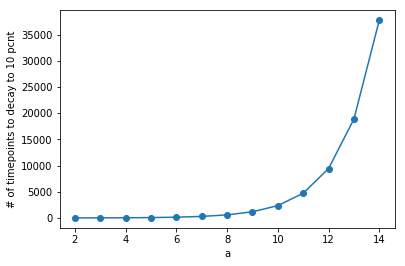

In [4]:
plt.figure(1)
plt.clf()
plt.plot(np.arange(2,max_a),thresh_tpt,'-o')
plt.xlabel('a')
plt.ylabel('# of timepoints to decay to 10 pcnt')

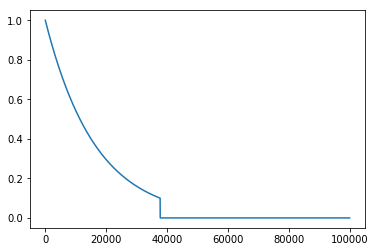

In [9]:
plt.figure(1)
plt.clf()
plt.plot(dat)